In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.merge(test_df, gender_submission_df[['PassengerId', 'Survived']], on='PassengerId')

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [5]:
total_missing = train_df.isnull().sum()
percentage_missing = (total_missing / len(train_df)) * 100
percentage_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
total_missing = gender_submission_df.isnull().sum()
percentage_missing = (total_missing / len(gender_submission_df)) * 100
percentage_missing

PassengerId    0.0
Survived       0.0
dtype: float64

In [7]:
total_missing = test_df.isnull().sum()
percentage_missing = (total_missing / len(test_df)) * 100
percentage_missing

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

2. En base al resultado anterior. Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [8]:
train_df.drop('Cabin',axis="columns",inplace = True)
test_df.drop('Cabin',axis="columns",inplace = True)

3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

<Axes: xlabel='Age', ylabel='Count'>

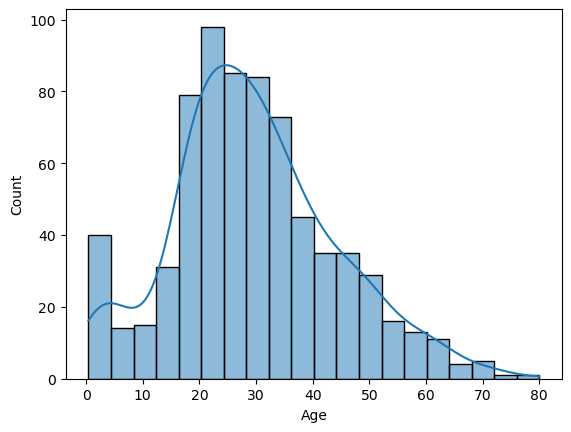

In [9]:
sns.histplot(data=train_df, x="Age",kde=True)

In [10]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

<Axes: xlabel='Embarked', ylabel='Count'>

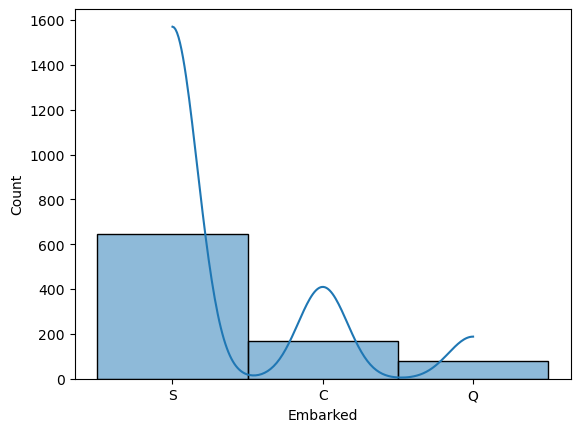

In [11]:
sns.histplot(data=train_df, x="Embarked",kde=True)

In [12]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True) #Hay que poner
# [0], para la moda

<Axes: xlabel='Fare', ylabel='Count'>

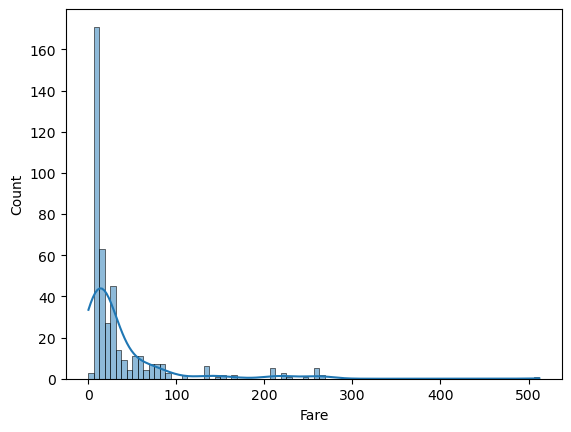

In [13]:
sns.histplot(data=test_df, x="Fare",kde=True)

In [14]:
#test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True) #mejor esto, que es solo
#un valor

In [15]:
test_df.loc[test_df.Fare.isnull(),:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [16]:
promedio_tercera_clase=test_df.loc[test_df["Pclass"]==3, "Fare"].mean()

In [17]:
test_df["Fare"].fillna(promedio_tercera_clase, inplace=True)

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

<Axes: xlabel='Pclass', ylabel='count'>

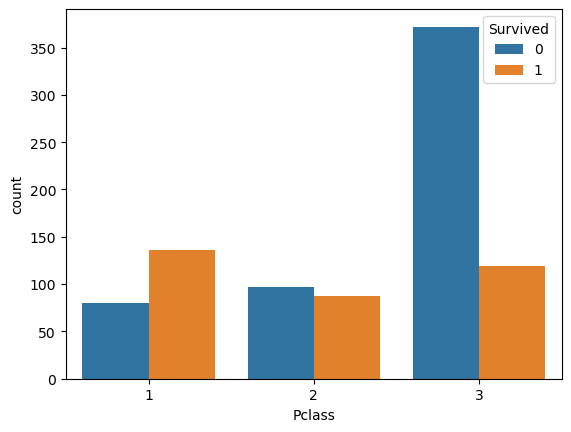

In [18]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

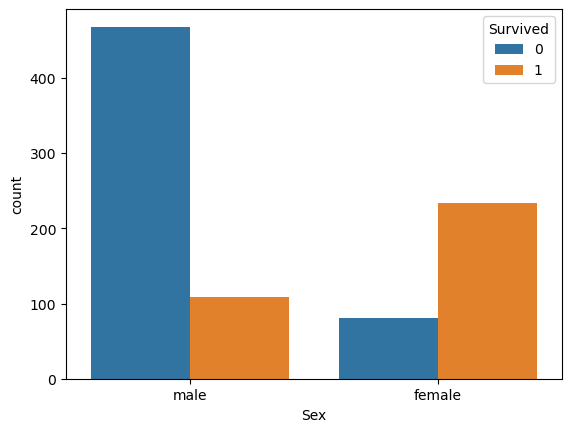

In [19]:
sns.countplot(data=train_df, x='Sex', hue='Survived')

(0.0, 200.0)

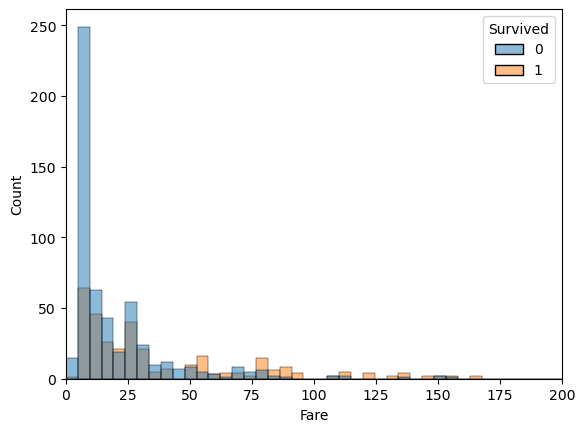

In [20]:
sns.histplot(data=train_df, x='Fare', hue='Survived')
plt.xlim((0,200))

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

In [21]:
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [22]:
train_df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [23]:
train_df.drop('PassengerId',axis="columns",inplace = True)
test_df.drop('PassengerId',axis="columns",inplace = True)
train_df.drop('Ticket',axis="columns",inplace = True)
test_df.drop('Ticket',axis="columns",inplace = True)
train_df.drop('Name',axis="columns",inplace = True)
test_df.drop('Name',axis="columns",inplace = True)

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [24]:
train_df["ISMinor"]=np.where(train_df['Age'] <= 16, 1, 0)

In [25]:
test_df["ISMinor"]=np.where(test_df['Age'] <= 16, 1, 0)

8. Ajustar modelo considerando todas las variables del dataset de testing.

In [26]:
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']
X_test = test_df.drop(columns=['Survived'])
y_test = test_df['Survived']
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [37]:
#El max_iter anterior lo ponemos para que no salte el warning, por muchas iteraciones

In [27]:
y_pred = model.predict(X_test)

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [28]:
test_df['prediccion'] = model.predict(X_test)
test_df['probabilidad_prediccion'] = model.predict_proba(X_test)[:,1]

10. Calcular matriz de confusión

In [29]:
matriz_confusion = confusion_matrix(y_test, y_pred)

In [30]:
matriz_confusion

array([[253,  13],
       [ 16, 136]], dtype=int64)

In [31]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

11. Calcular Accuracy

In [32]:
(TN + TP) / (TN + TP + FN + FP)

0.930622009569378

12. Calcular sensibilidad

In [33]:
TP / (TP + FN)

0.8947368421052632

13. Calcular especificidad

In [34]:
TN / (TN + FP)

0.9511278195488722

14. Graficar curva de ROC

<Axes: >

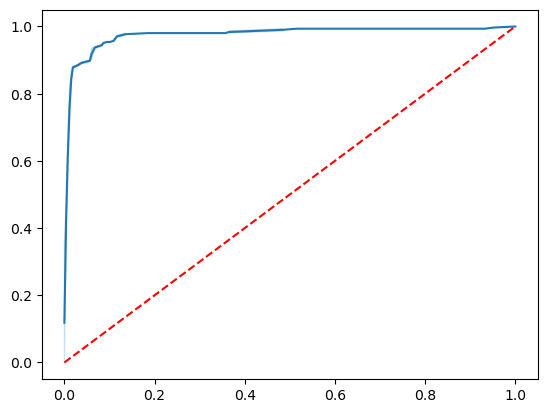

In [35]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

15. Calcular valor de área bajo la curva de ROC

In [36]:
roc_auc_score(y_test, y_pred_proba)

0.9762811634349031